# **week 34-35**

## **Exercise 2: making your own data and exploring scikit-learn**

1. Write your own code (following the examples under the [regression notes](https://compphysics.github.io/MachineLearning/doc/LectureNotes/_build/html/chapter1.html)) for computing the parametrization of the data set fitting a second-order polynomial.

2. Use thereafter **scikit-learn** (see again the examples in the regression slides) and compare with your own code.   

3. Using scikit-learn, compute also the mean square error, a risk metric corresponding to the expected value of the squared (quadratic) error defined as

$$
MSE(\boldsymbol{y},\boldsymbol{\tilde{y}}) = \frac{1}{n}
\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2,
$$

and the $R^2$ score function.
If $\tilde{\boldsymbol{y}}_i$ is the predicted value of the $i-th$ sample and $y_i$ is the corresponding true value, then the score $R^2$ is defined as

$$
R^2(\boldsymbol{y}, \tilde{\boldsymbol{y}}) = 1 - \frac{\sum_{i=0}^{n - 1} (y_i - \tilde{y}_i)^2}{\sum_{i=0}^{n - 1} (y_i - \bar{y})^2},
$$

where we have defined the mean value  of $\boldsymbol{y}$ as

$$
\bar{y} =  \frac{1}{n} \sum_{i=0}^{n - 1} y_i.
$$

You can use the functionality included in scikit-learn. If you feel for it, you can use your own program and define functions which compute the above two functions.
Discuss the meaning of these results. Try also to vary the coefficient in front of the added stochastic noise term and discuss the quality of the fits.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = np.random.rand(100,1)
y = 2.0+5*x*x+0.1*np.random.randn(100,1)

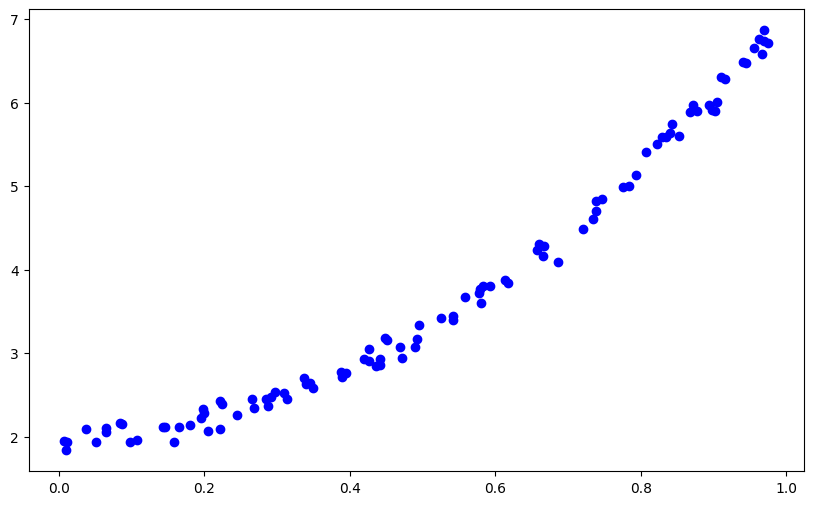

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x,y, color='blue')
plt.show()

1. Parametrization of the Data Set Fitting a Second-Order Polynomial

In [ ]:
# design matrix X of a second-order polynomial
X = np.hstack([np.ones_like(x), x, x**2])

# coefficients using normal equation
coefficients = np.linalg.inv(X.T @ X) @ X.T @ y

print("coefficients:\n",coefficients)

coefficients:
 [[1.99202156]
 [0.03578269]
 [5.01305484]]


2. Using Scikit-Learn for Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures # if we dont use it the results is the same
from sklearn.linear_model import LinearRegression

# Transforming the input data
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(x)

# Fitting the model
model = LinearRegression()
model.fit(X_poly, y)

intercept = model.intercept_
coefficients = model.coef_

print("Intercept:", intercept)
print("Coefficients:", coefficients)

Intercept: [1.99202156]
Coefficients: [[0.         0.03578269 5.01305484]]


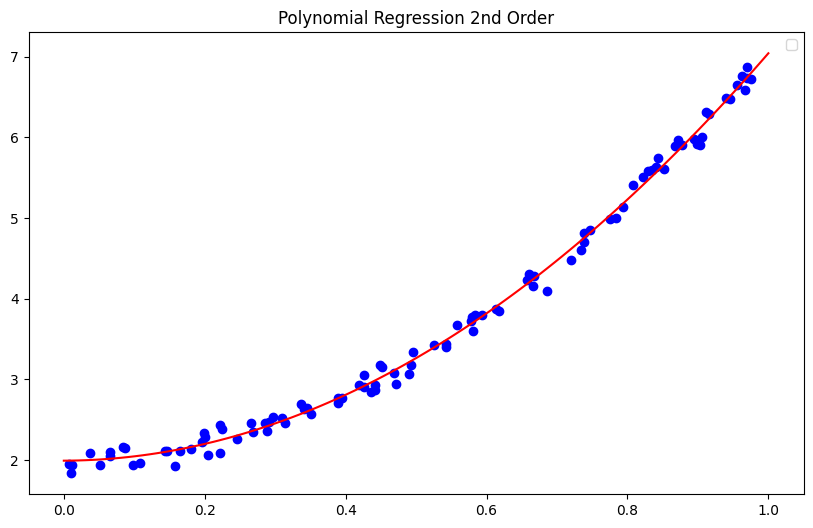

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue')
x_line = np.linspace(0, 1, 100).reshape(-1, 1)
X_line_poly = poly.transform(x_line)
y_line = model.predict(X_line_poly)
plt.plot(x_line, y_line, color='red')

plt.title('Polynomial Regression 2nd Order')
plt.legend()
plt.show()

3. Computing the Mean Square Error (MSE)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicting the outputs
y_pred = model.predict(X_poly)

# MSE
mse = mean_squared_error(y, y_pred)
print(f"MSE: {mse:.4f}")
print(f"R2: {r2_score(y, y_pred):.4f}")

MSE: 0.0094
R2: 0.9961


the value of the MSE is very low, this indicate that the model have an high precision because the predicted values are close to the real ones. If we look at the R^2 value, we can see that also this is very high, this means that the data fit very well and the model is good in predicting.

In [ ]:
# standard scaler
import sklearn.linear_model as skl
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
import numpy as np
import pandas as pd
from IPython.display import display

scaler = StandardScaler(with_std=False)
scaler.fit(X_poly)
X_poly_scaled = scaler.transform(X_poly)



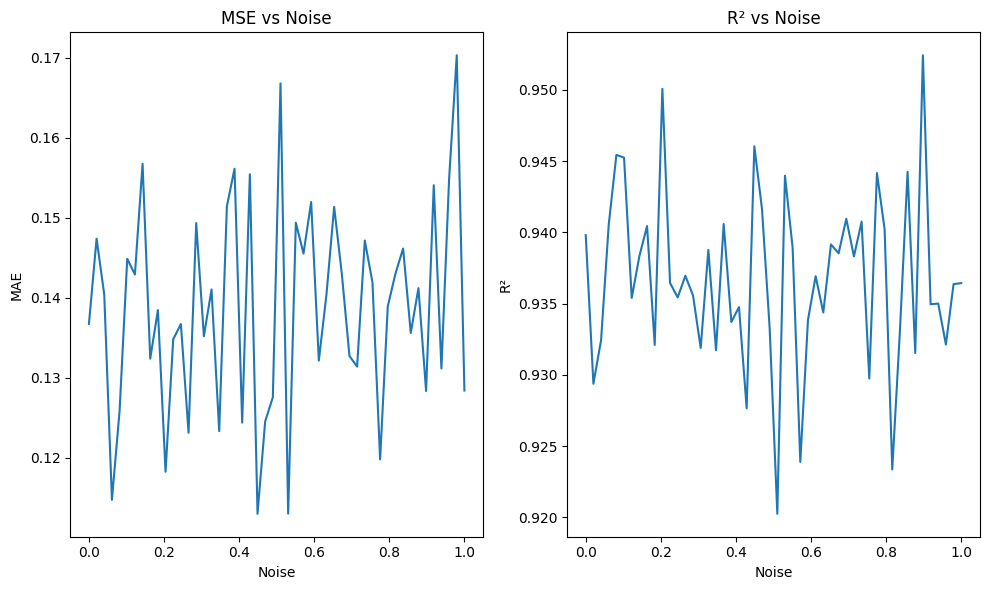

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# generating funcction for encreasing noise
def generate_data(noise_level):
    x = np.random.rand(100, 1)
    y_true = 2.0 + 5 * x * x
    noise = noise_level * np.random.randn(100, 1)
    y = y_true + noise
    return x, y, y_true

# func for the model
def evaluate_model(x, y, y_true):
    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)
    mae = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, r2

# initializing arrays
noise_levels = np.linspace(0, 1, 50)
mae_values = []
r2_values = []

# Looping
for noise_level in noise_levels:
    x, y, y_true = generate_data(noise_level)
    mae, r2 = evaluate_model(x, y, y_true)
    mae_values.append(mae)
    r2_values.append(r2)

# Plot
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(noise_levels, mae_values)
plt.title('MSE vs Noise')
plt.xlabel('Noise')
plt.ylabel('MAE')

plt.subplot(1, 2, 2)
plt.plot(noise_levels, r2_values)
plt.title('R² vs Noise')
plt.xlabel('Noise')
plt.ylabel('R²')

plt.tight_layout()
plt.show()


## **Exercise 3: Split data in test and training data**

1. Write a first code which sets up a design matrix
 defined by a fifth-order polynomial and split your data set in training and test data.

2. Write thereafter (using either scikit-learn or your matrix inversion code using for example numpy) and perform an ordinary least squares fitting and compute the mean squared error for the training data and the test data. These calculations should apply to a model given by a fifth-order polynomial.

3. Add now a model which allows you to make polynomials up to degree
. Perform a standard OLS fitting of the training data and compute the MSE for the training and test data and plot both test and training data MSE as functions of the polynomial degree. Compare what you see with Figure 2.11 of Hastie et al. Comment your results. For which polynomial degree do you find an optimal MSE (smallest value)?

In [ ]:
np.random.seed(42)
n = 100
# Make data set
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

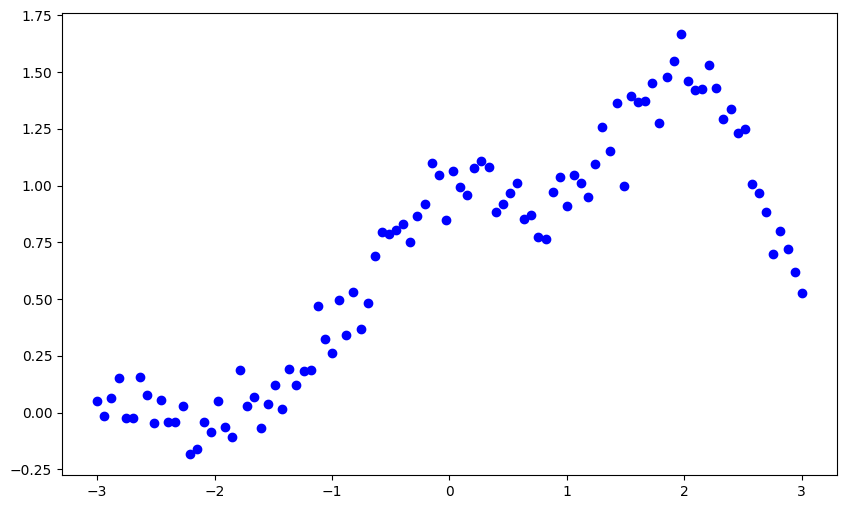

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x,y, color='blue')
plt.show()

1. Design Matrix and split

In [ ]:
from sklearn.model_selection import train_test_split

# design matrix for a 5th order polynomial
X = np.hstack([x**i for i in range(6)])

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
display(X)

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01,  8.10000000e+01, -2.43000000e+02],
       [ 1.00000000e+00, -2.93939394e+00,  8.64003673e+00,
        -2.53964716e+01,  7.46502347e+01, -2.19426447e+02],
       [ 1.00000000e+00, -2.87878788e+00,  8.28741965e+00,
        -2.38577232e+01,  6.86813245e+01, -1.97718964e+02],
       [ 1.00000000e+00, -2.81818182e+00,  7.94214876e+00,
        -2.23824192e+01,  6.30777269e+01, -1.77764503e+02],
       [ 1.00000000e+00, -2.75757576e+00,  7.60422406e+00,
        -2.09692239e+01,  5.78242235e+01, -1.59454677e+02],
       [ 1.00000000e+00, -2.69696970e+00,  7.27364555e+00,
        -1.96168016e+01,  5.29059195e+01, -1.42685662e+02],
       [ 1.00000000e+00, -2.63636364e+00,  6.95041322e+00,
        -1.83238167e+01,  4.83082440e+01, -1.27358098e+02],
       [ 1.00000000e+00, -2.57575758e+00,  6.63452709e+00,
        -1.70889334e+01,  4.40169497e+01, -1.13376992e+02],
       [ 1.00000000e+00, -2.51515152e+00,  6.325

2. OLS Fitting and MSE

In [ ]:
# Perform Ordinary Least Squares (OLS) fitting
from sklearn.pipeline import make_pipeline

model = make_pipeline(PolynomialFeatures(degree=5), LinearRegression())


model.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Compute Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"MSE (Train data): {mse_train:.4f}")
print(f"MSE (Test data): {mse_test:.4f}")
print(f"R2 (Train data): {r2_score(y_train, y_train_pred):.4f}")
print(f"R2 (Test data): {r2_score(y_test, y_test_pred):.4f}")

MSE (Train data): 0.0062
MSE (Test data): 0.0108
R2 (Train data): 0.9759
R2 (Test data): 0.9672


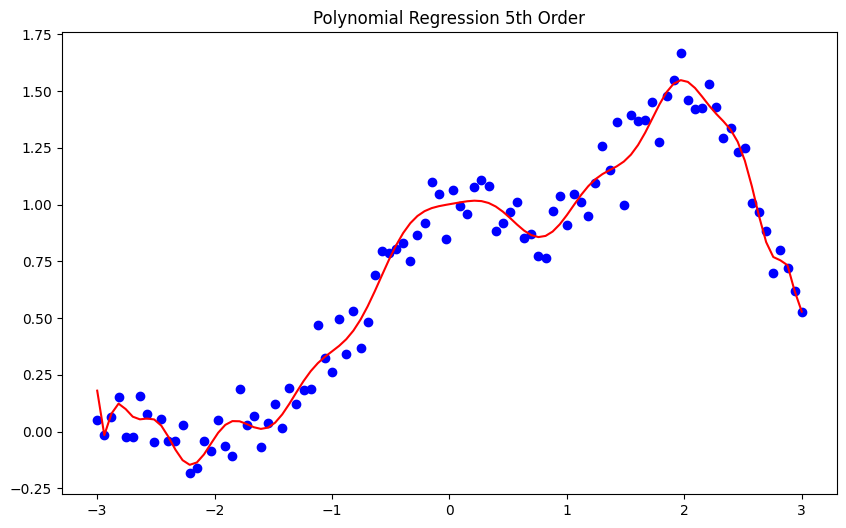

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue')
plt.plot(x, model.predict(X), color='red')
plt.title('Polynomial Regression 5th Order')
plt.show()

3. 15th Degree Polynomial

In [ ]:
max_degree = 16

MSE_train_values = []
MSE_test_values = []

for p in range(1, max_degree):
    model = make_pipeline(PolynomialFeatures(degree = 2, include_bias = True), LinearRegression(fit_intercept = False))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    MSE_train = mean_squared_error(y_train, y_train_pred)
    MSE_test = mean_squared_error(y_test, y_test_pred)

    MSE_train_values.append(MSE_train)
    MSE_test_values.append(MSE_test)

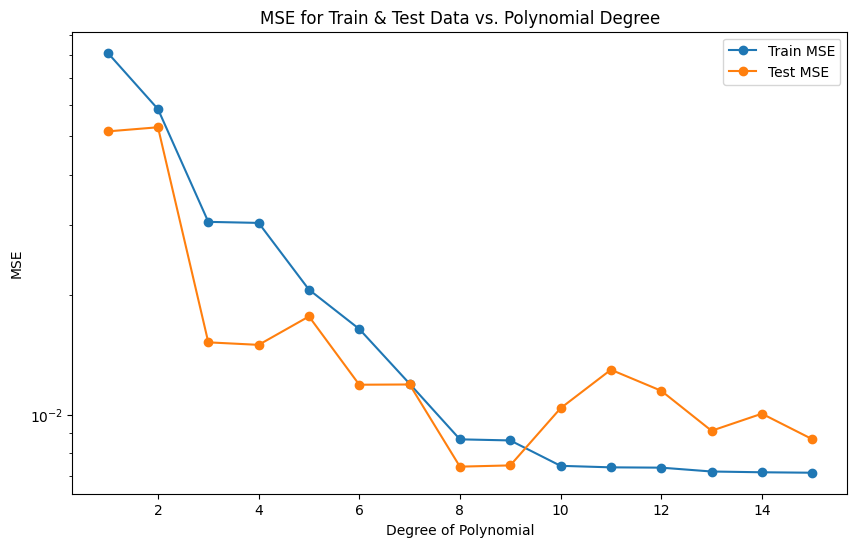

Optimal polynomial degree: 8


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

max_degree = 15

# Initializing arrays
mse_train_values = []
mse_test_values = []

# Split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Loop iteration
for degree in range(1, max_degree + 1):
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    mse_train_values.append(mse_train)
    mse_test_values.append(mse_test)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_degree + 1), mse_train_values, label='Train MSE', marker='o')
plt.plot(range(1, max_degree + 1), mse_test_values, label='Test MSE', marker='o')
plt.xlabel('Degree of Polynomial')
plt.ylabel('MSE')
plt.title('MSE for Train & Test Data vs. Polynomial Degree')
plt.yscale('log')
plt.legend()
plt.show()

# Finding the optimal degree with the smallest test MSE
optimal_degree = np.argmin(mse_test_values) + 1
print(f'Optimal polynomial degree: {optimal_degree}')

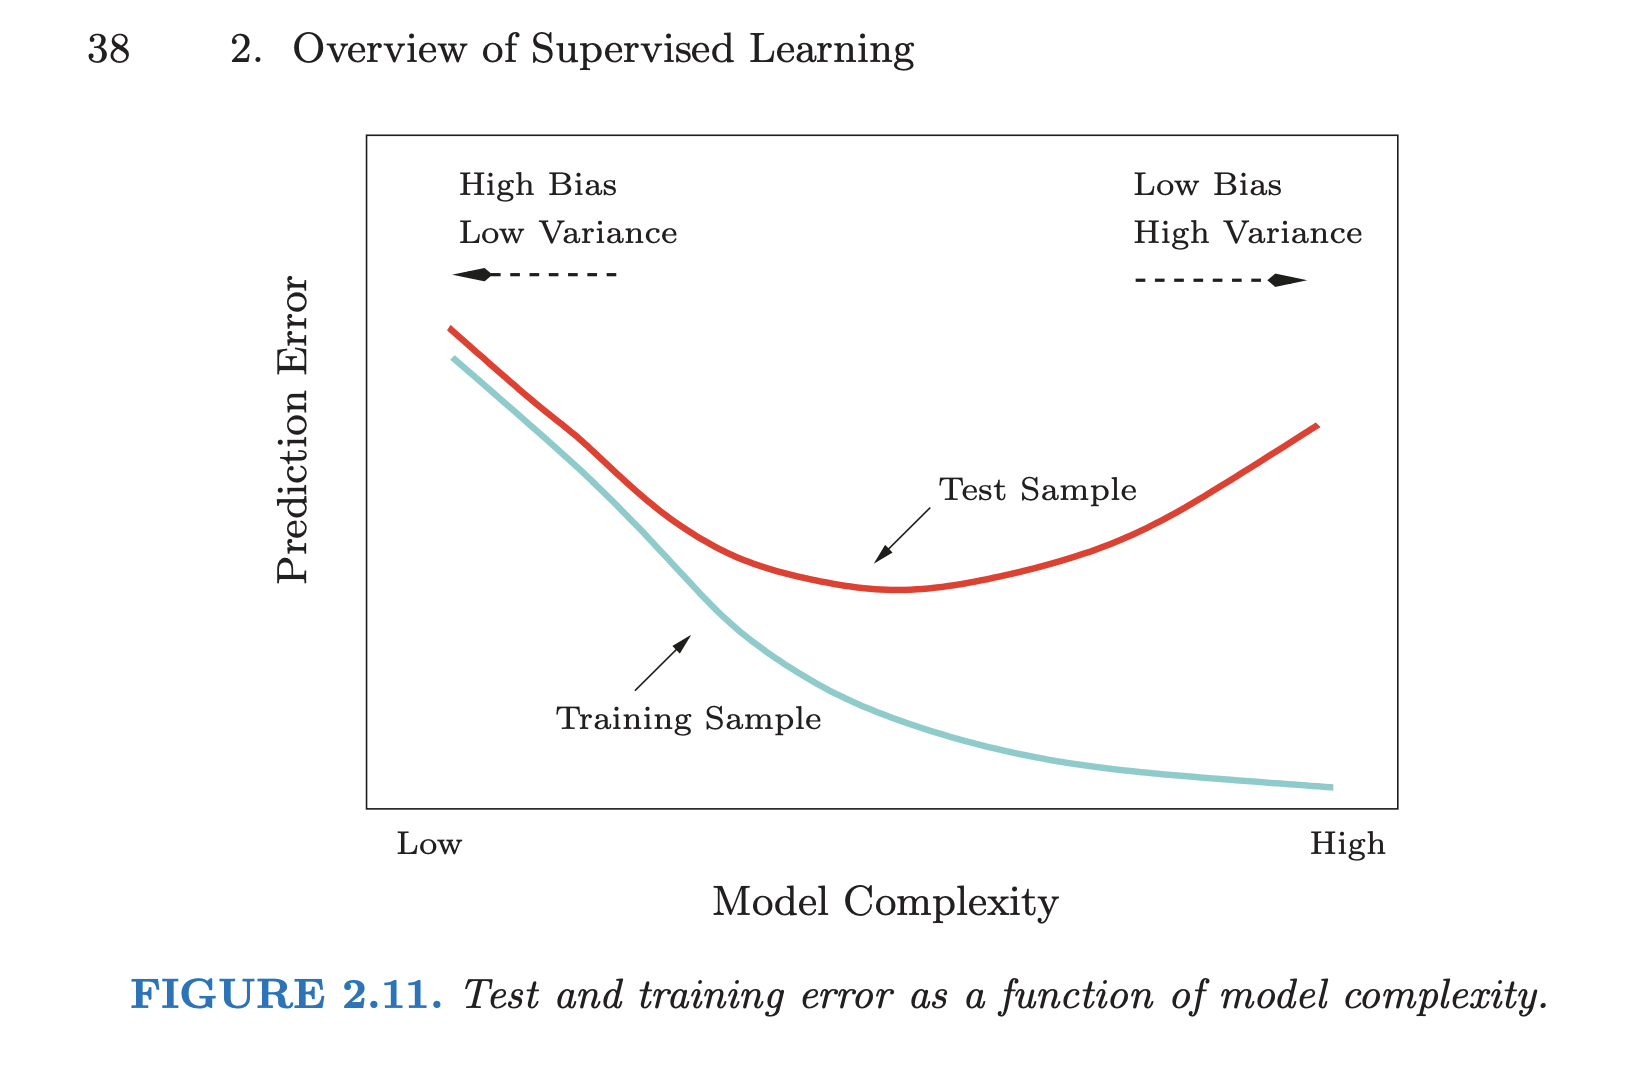

### **Results**
As the polynomial degree increases, increase also the complexity and this can lead to overfitting problems. The optimal degree is where the test MSE is minimized and in this case is 9 degrees.

Respect in Hastie et al., we have differences because in our function the error is minimised in the optimal MSE, insted in the other the training error continues to decrease with model complexity (also in doesnt show a 'U' shape, that indicates the optimal model complexity)

## **Exercise 1: Analytical exercises**

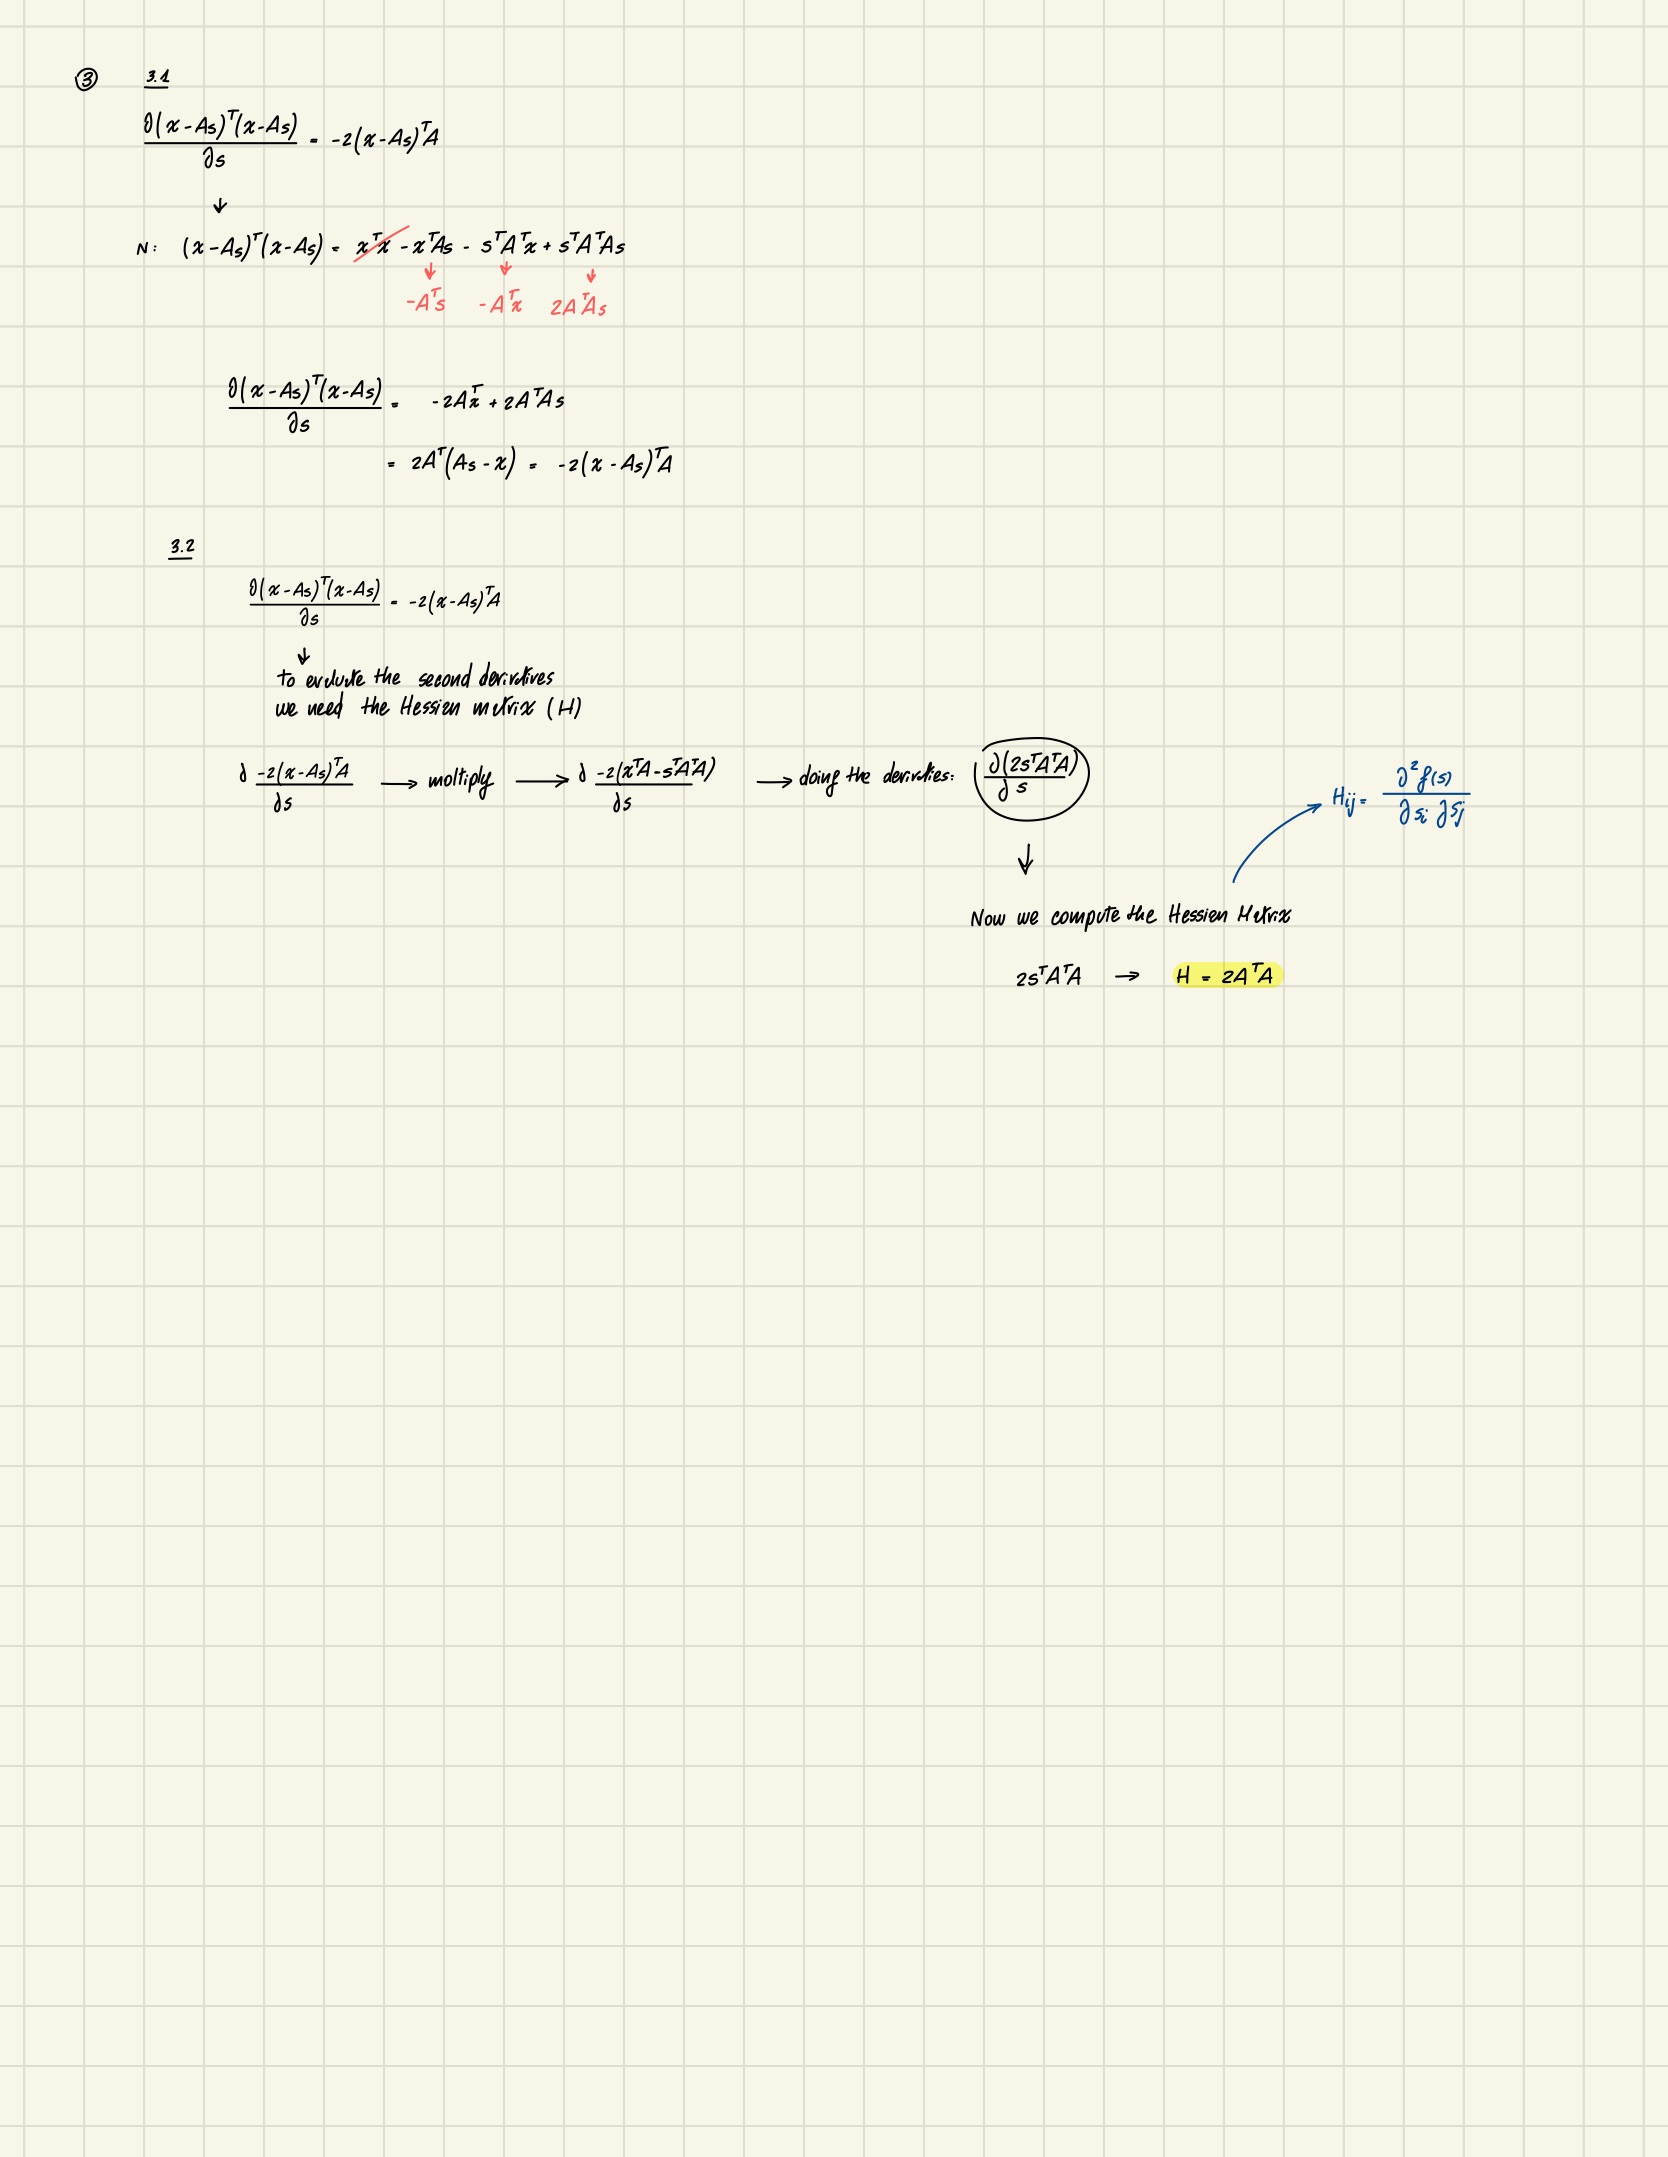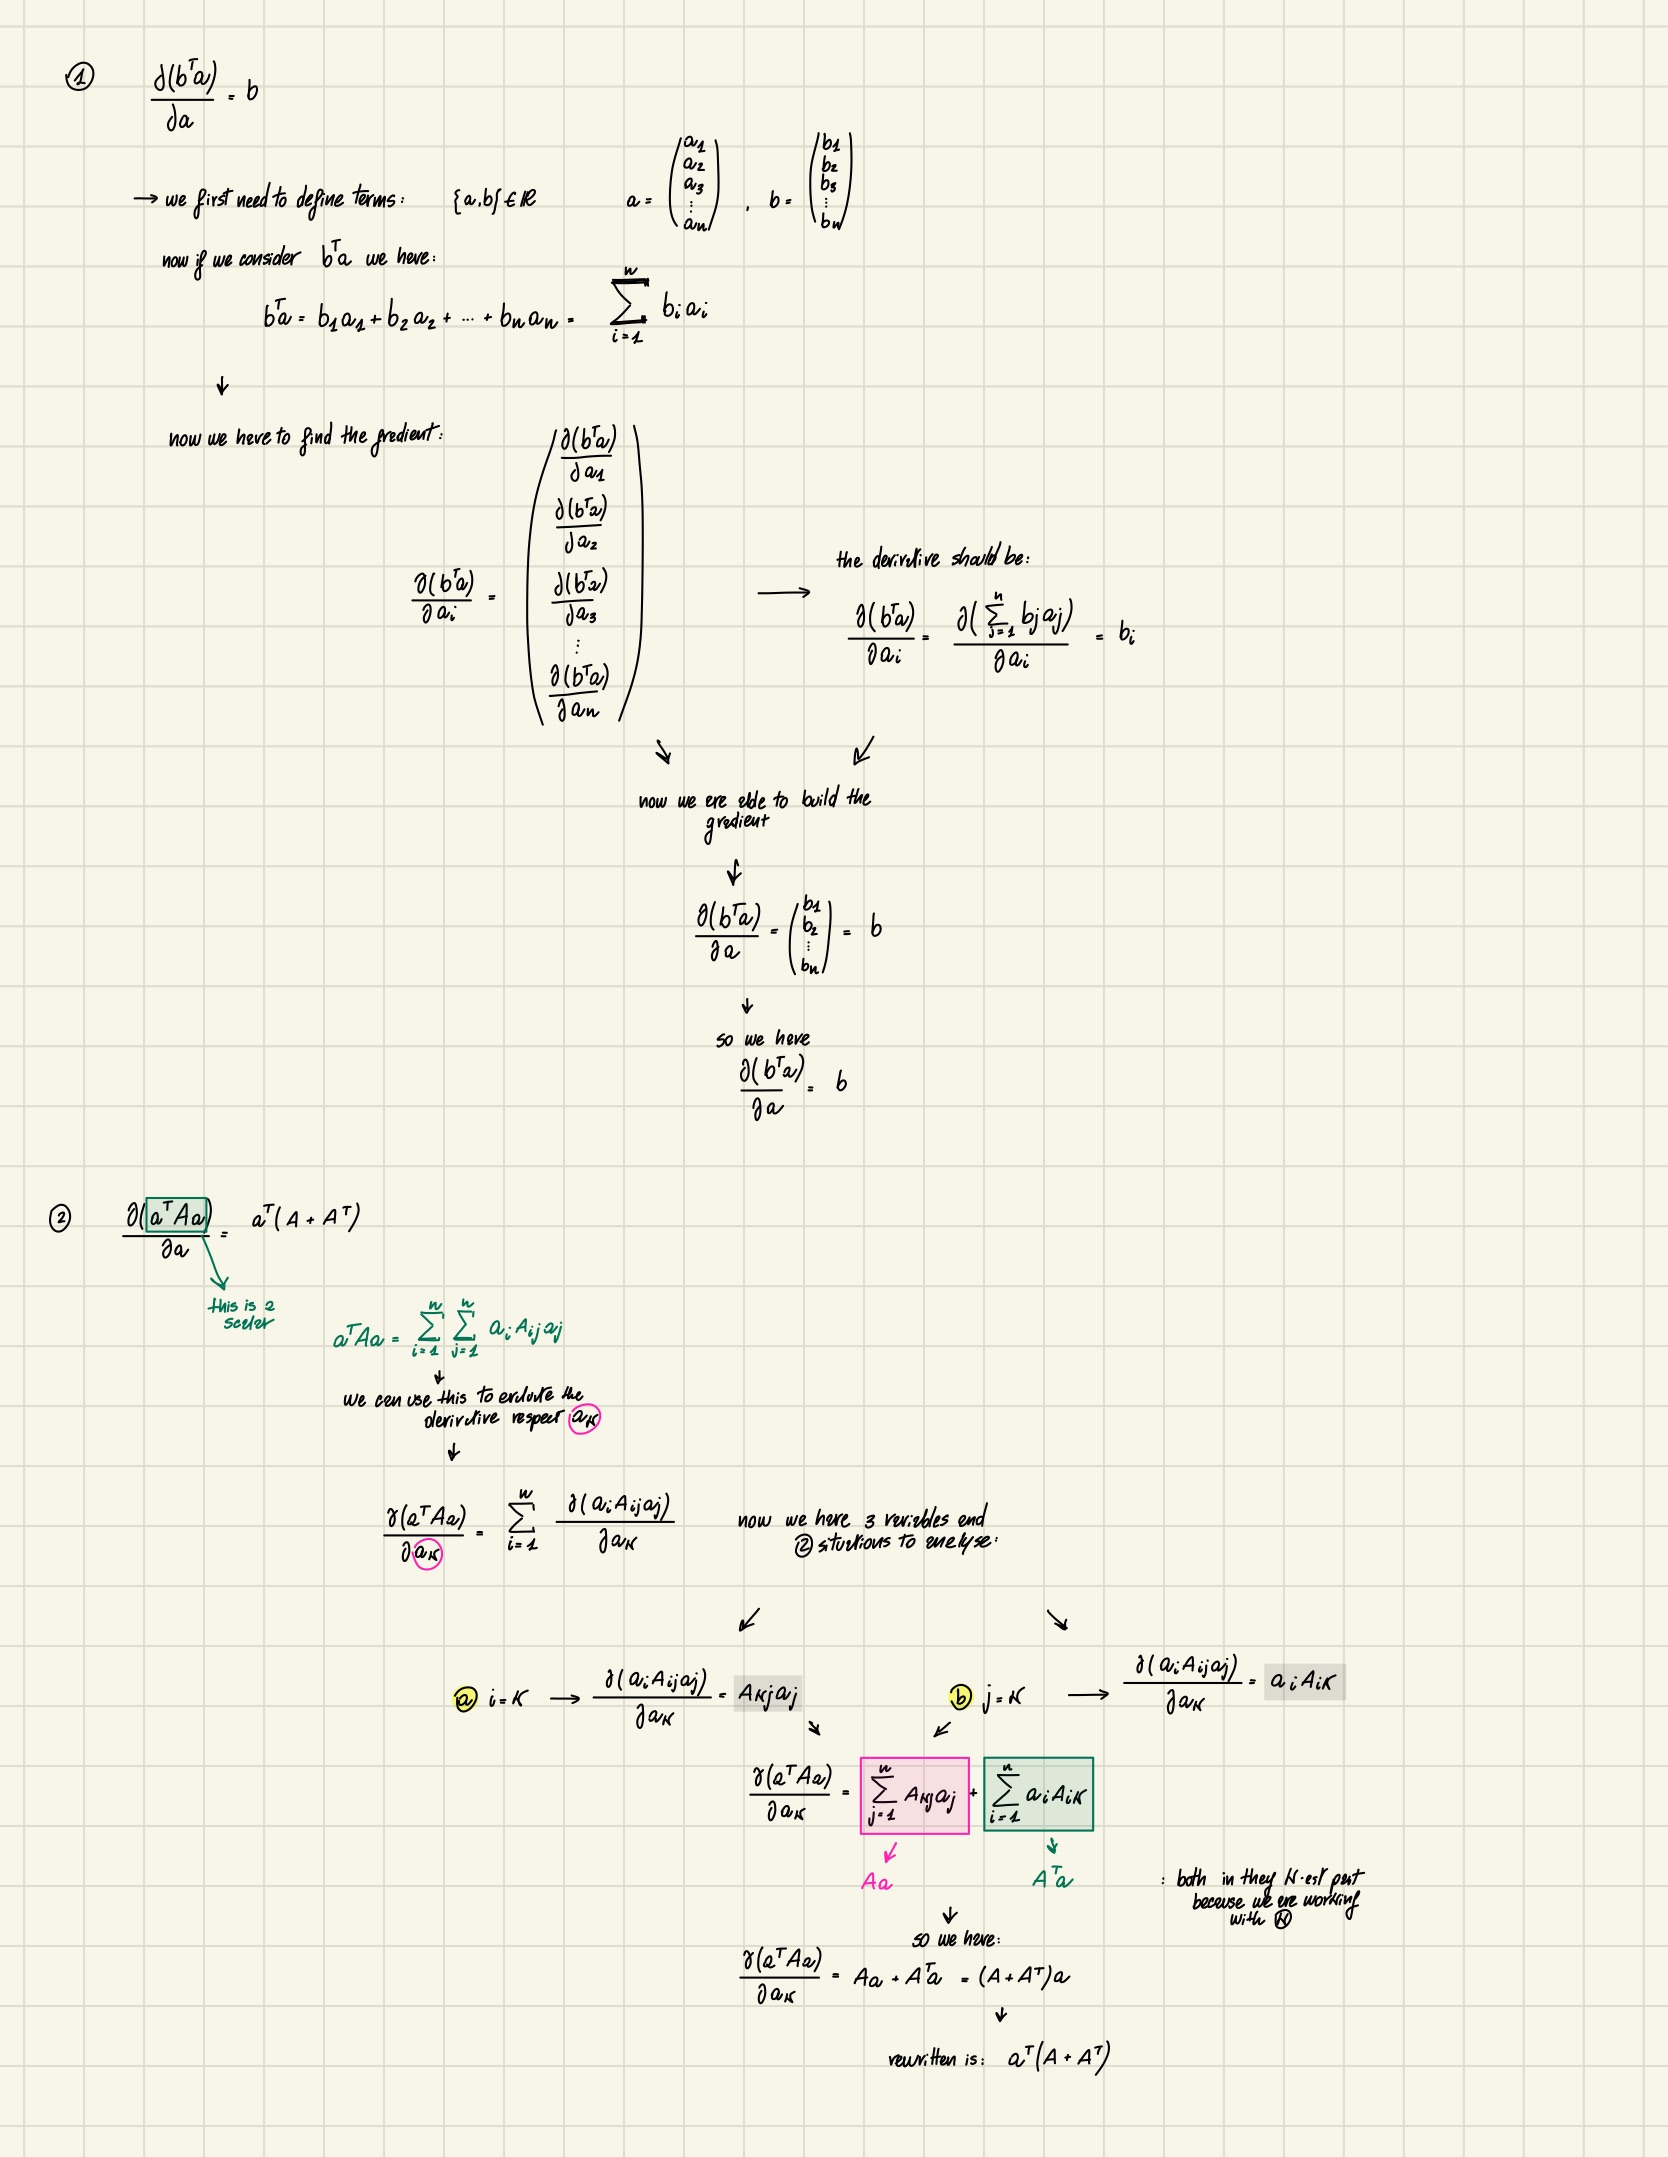

## **Citations**
- https://compphysics.github.io/MachineLearning/doc/LectureNotes/_build/html/linalg.html
- https://compphysics.github.io/MachineLearning/doc/LectureNotes/_build/html/statistics.html
- https://chatgpt.com/c/072d89c0-dda9-4eab-8cb6-30bd6d79bc87
- https://compphysics.github.io/MachineLearning/doc/LectureNotes/_build/html/exercisesweek35.html